In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('Indian_earthquake_data.csv')

In [4]:
print("Initial dataset:")
print(df.head())

Initial dataset:
               Origin Time  Latitude  Longitude  Depth  Magnitude  \
0  2021-07-31 09:43:23 IST     29.06      77.42    5.0        2.5   
1  2021-07-30 23:04:57 IST     19.93      72.92    5.0        2.4   
2  2021-07-30 21:31:10 IST     31.50      74.37   33.0        3.4   
3  2021-07-30 13:56:31 IST     28.34      76.23    5.0        3.1   
4  2021-07-30 07:19:38 IST     27.09      89.97   10.0        2.1   

                               Location  
0          53km NNE of New Delhi, India  
1  91km W of Nashik, Maharashtra, India  
2   49km WSW of Amritsar, Punjab, India  
3           50km SW of Jhajjar, Haryana  
4            53km SE of Thimphu, Bhutan  


In [5]:
df.columns = df.columns.str.strip()

In [8]:
df['Origin Time'] = pd.to_datetime(df['Origin Time'], format='%Y-%m-%d %H:%M:%S IST')

In [9]:
print(df.columns) 

Index(['Origin Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude',
       'Location'],
      dtype='object')


In [10]:
df['Year'] = df['Origin Time'].dt.year
df['Month'] = df['Origin Time'].dt.month
df['Day'] = df['Origin Time'].dt.day
df['Hour'] = df['Origin Time'].dt.hour
df['Minute'] = df['Origin Time'].dt.minute
df['Second'] = df['Origin Time'].dt.second

In [11]:
print("\nMissing Values Before Handling:")
print(df.isnull().sum())



Missing Values Before Handling:
Origin Time    0
Latitude       0
Longitude      0
Depth          0
Magnitude      0
Location       0
Year           0
Month          0
Day            0
Hour           0
Minute         0
Second         0
dtype: int64


In [12]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.impute import SimpleImputer


In [14]:
print(df.columns)


Index(['Origin Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude',
       'Location', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'],
      dtype='object')


In [15]:
numerical_columns = ['Latitude', 'Longitude', 'Depth', 'Magnitude']
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

In [16]:
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
Origin Time    0
Latitude       0
Longitude      0
Depth          0
Magnitude      0
Location       0
Year           0
Month          0
Day            0
Hour           0
Minute         0
Second         0
dtype: int64


In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()
df[['Latitude', 'Longitude', 'Depth', 'Magnitude']] = scaler.fit_transform(
    df[['Latitude', 'Longitude', 'Depth', 'Magnitude']]
)

In [19]:
print("\nNormalized Features:")
print(df[['Latitude', 'Longitude', 'Depth', 'Magnitude']].head())


Normalized Features:
   Latitude  Longitude     Depth  Magnitude
0  0.725677   0.431669  0.008932   0.181818
1  0.496740   0.318205  0.008932   0.163636
2  0.786861   0.354766  0.068481   0.345455
3  0.707623   0.401664  0.008932   0.290909
4  0.676279   0.748109  0.019566   0.109091


In [20]:
def categorize_magnitude(magnitude):
    if magnitude < 4.0:
        return "minor"
    elif 4.0 <= magnitude < 6.0:
        return "light"
    elif 6.0 <= magnitude < 7.0:
        return "moderate"
    elif 7.0 <= magnitude < 8.0:
        return "strong"
    else:
        return "severe"

df['Magnitude Category'] = df['Magnitude'].apply(categorize_magnitude)
print("\nMagnitude Categories:")
print(df['Magnitude Category'].value_counts())


Magnitude Categories:
Magnitude Category
minor    2719
Name: count, dtype: int64


In [21]:
def categorize_depth(depth):
    if depth < 70:
        return "shallow"
    elif 70 <= depth < 300:
        return "intermediate"
    else:
        return "deep"

df['Depth Category'] = df['Depth'].apply(categorize_depth)
print("\nDepth Categories:")
print(df['Depth Category'].value_counts())


Depth Categories:
Depth Category
shallow    2719
Name: count, dtype: int64


In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
categorical_columns = ['Magnitude Category', 'Depth Category']

In [24]:
print("\nColumns in DataFrame:")
print(df.columns)



Columns in DataFrame:
Index(['Origin Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude',
       'Location', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second',
       'Magnitude Category', 'Depth Category'],
      dtype='object')


In [25]:
df.columns = df.columns.str.strip() 

In [26]:
encoder = OneHotEncoder(sparse_output=False)


In [27]:
encoded_cats = pd.DataFrame(
    encoder.fit_transform(df[categorical_columns]),
    columns=encoder.get_feature_names_out(categorical_columns)
)

In [28]:
df_encoded = pd.concat([df, encoded_cats], axis=1)

In [29]:
print("\nData After One-Hot Encoding:")
print(df.head())


Data After One-Hot Encoding:
          Origin Time  Latitude  Longitude     Depth  Magnitude  \
0 2021-07-31 09:43:23  0.725677   0.431669  0.008932   0.181818   
1 2021-07-30 23:04:57  0.496740   0.318205  0.008932   0.163636   
2 2021-07-30 21:31:10  0.786861   0.354766  0.068481   0.345455   
3 2021-07-30 13:56:31  0.707623   0.401664  0.008932   0.290909   
4 2021-07-30 07:19:38  0.676279   0.748109  0.019566   0.109091   

                               Location  Year  Month  Day  Hour  Minute  \
0          53km NNE of New Delhi, India  2021      7   31     9      43   
1  91km W of Nashik, Maharashtra, India  2021      7   30    23       4   
2   49km WSW of Amritsar, Punjab, India  2021      7   30    21      31   
3           50km SW of Jhajjar, Haryana  2021      7   30    13      56   
4            53km SE of Thimphu, Bhutan  2021      7   30     7      19   

   Second Magnitude Category Depth Category  
0      23              minor        shallow  
1      57              m

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
sns.set(style="whitegrid")

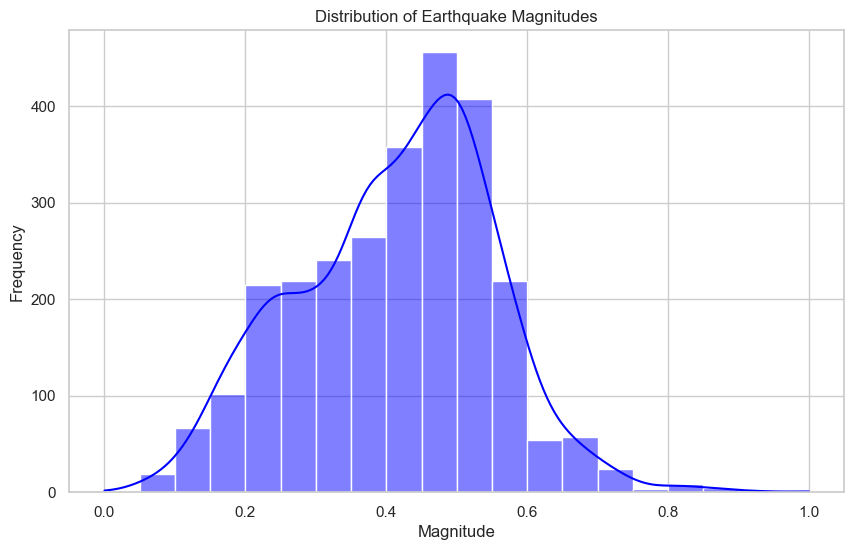

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Magnitude'], bins=20, kde=True, color='blue')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

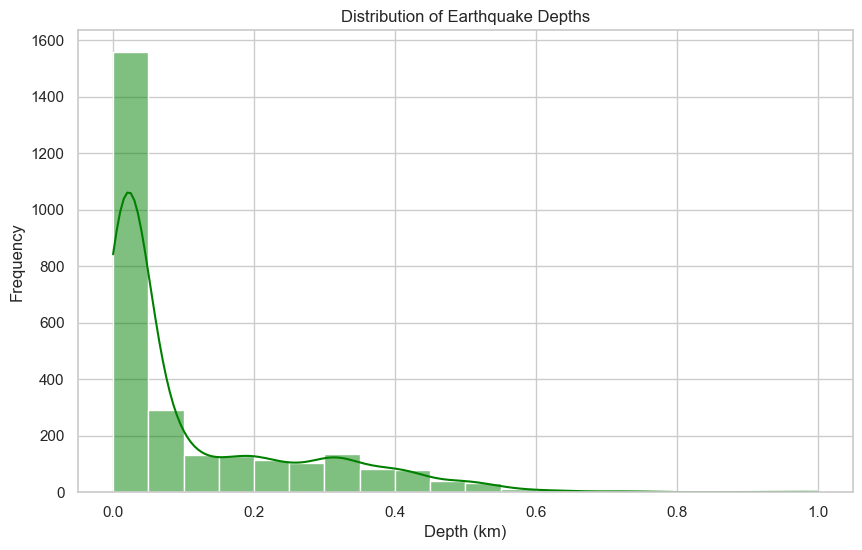

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Depth'], bins=20, kde=True, color='green')
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.show()

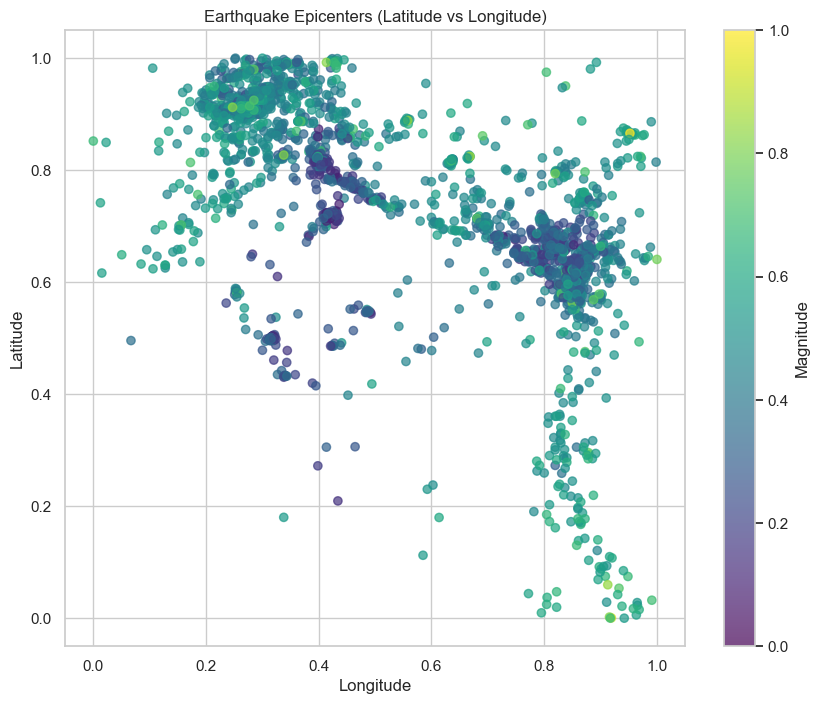

In [34]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Magnitude'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Magnitude')
plt.title('Earthquake Epicenters (Latitude vs Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

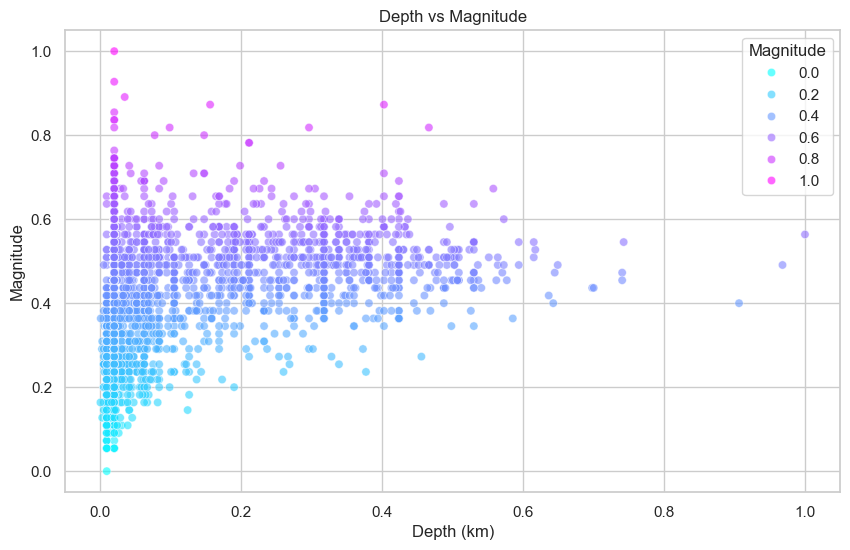

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Depth', y='Magnitude', hue='Magnitude', palette='cool', alpha=0.6)
plt.title('Depth vs Magnitude')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

In [36]:
df.to_csv('preprocessed_earthquake_data.csv', index=False)
print("Preprocessed data saved to 'preprocessed_earthquake_data.csv'.")

Preprocessed data saved to 'preprocessed_earthquake_data.csv'.


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

In [38]:
print(df.columns)

Index(['Origin Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude',
       'Location', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second',
       'Magnitude Category', 'Depth Category'],
      dtype='object')


In [45]:
df = df.drop(['Origin Time'], axis=1)

In [46]:
df = df.loc[:, ~df.columns.str.startswith('Location_')]

In [47]:
print(df.columns)

Index(['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'Second', 'Magnitude Category',
       'Depth Category'],
      dtype='object')


In [48]:
df = df.dropna()

In [49]:
X = df[['Latitude', 'Longitude', 'Depth']]  # Features
y = df['Magnitude']  # Target variable

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [53]:
y_pred = model.predict(X_test_scaled)

In [54]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [55]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.01833476336681641
R-squared: 0.05694274779304498


In [56]:
!pip install seaborn

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

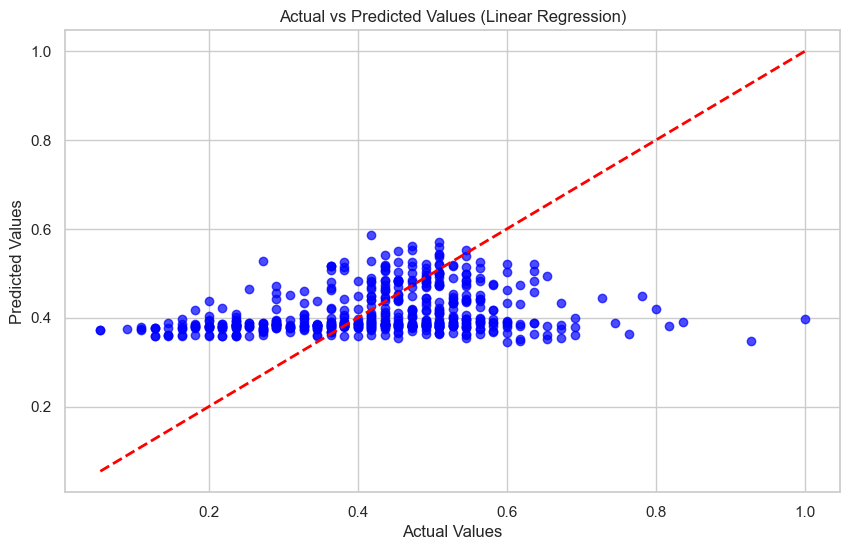

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.show()

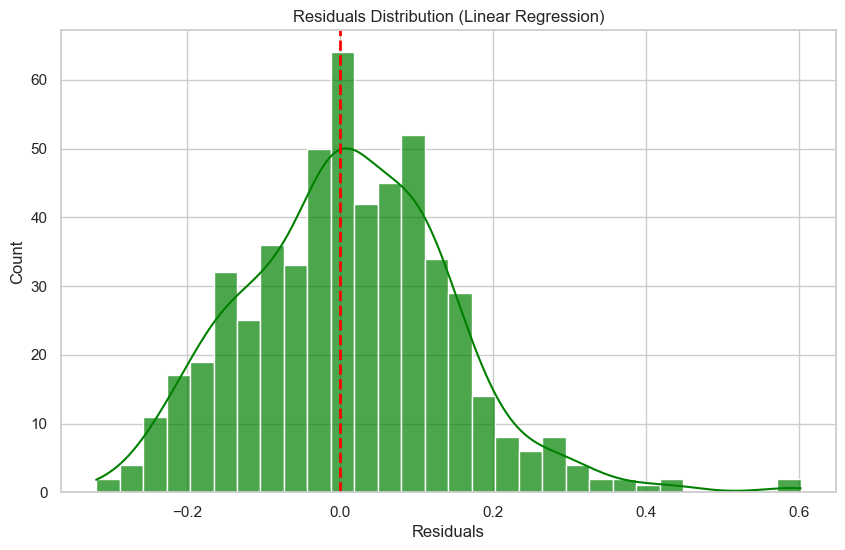

In [59]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='green', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Residuals")
plt.title("Residuals Distribution (Linear Regression)")
plt.show()


In [60]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
df = df.drop(['Origin Time'], axis=1, errors='ignore')  # Drop 'Origin Time' if it exists
df = df.loc[:, ~df.columns.str.startswith('Location_')]  # Drop 'Location_' columns if they exist

In [62]:
df = df.dropna()

In [63]:
X = df.drop('Magnitude', axis=1)  # Use all columns except 'Magnitude' as features
y = df['Magnitude']   

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
print(X_train.dtypes)


Latitude     float64
Longitude    float64
Depth        float64
dtype: object


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [82]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
svr_model = SVR(kernel='rbf', C=1, gamma='scale')

In [84]:
svr_model.fit(X_train_scaled, y_train)

SVR(C=1)

In [85]:
y_pred = svr_model.predict(X_test_scaled)

In [86]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [87]:
print(f"SVM Model Evaluation (SVR):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

SVM Model Evaluation (SVR):
Mean Squared Error (MSE): 0.0105
R-squared (R²): 0.4590


In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [89]:
X, y = datasets.make_classification(n_samples=100, n_features=2, n_classes=2, 
                                     n_informative=2, n_redundant=0, 
                                     n_repeated=0, random_state=42)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [92]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

In [93]:
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

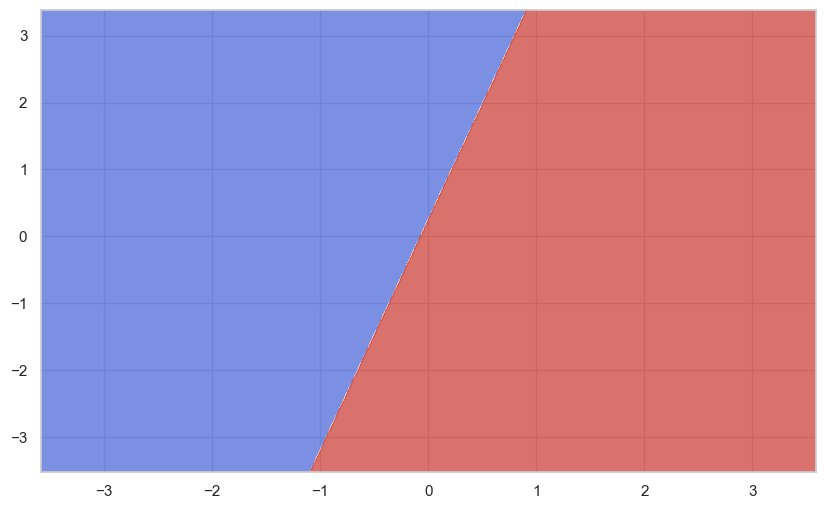

In [94]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)

In [95]:
plt.show()

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [134]:
model = GaussianNB()

In [135]:
model.fit(X_train, y_train)

GaussianNB()

In [136]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9666666666666667


In [137]:
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [139]:
all_labels = np.concatenate([y_train, y_test])
label_encoder.fit(all_labels)

LabelEncoder()

In [140]:
y_train_encoded = label_encoder.transform(y_train)

In [141]:
y_test_encoded = label_encoder.transform(y_test)

In [142]:
y_pred_encoded = label_encoder.transform(y_pred)

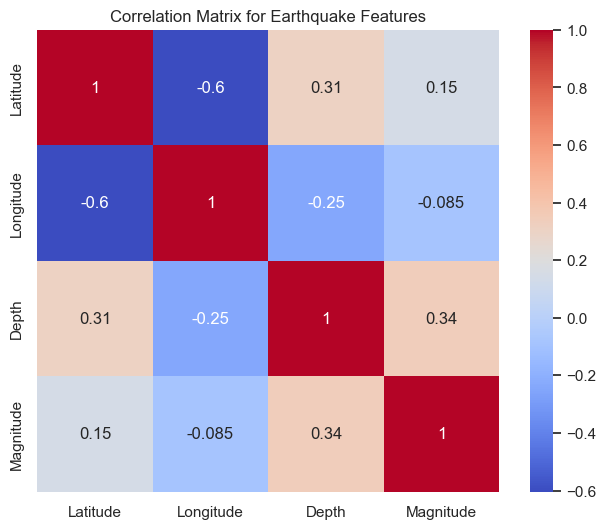

In [143]:
plt.figure(figsize=(8, 6))
corr_matrix = df[['Latitude', 'Longitude', 'Depth', 'Magnitude']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Earthquake Features')
plt.show()

In [144]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [146]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [147]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [148]:
y_pred_rf = rf_regressor.predict(X_test)

In [149]:
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred_rf)

In [150]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Absolute Error: 0.06566666666666666
Mean Squared Error: 0.02793666666666667
Root Mean Squared Error: 0.16714265364252975
R^2 Score: 0.8877544642857143


In [151]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [152]:
df= df[['Latitude', 'Longitude', 'Depth', 'Year', 'Month', 'Day', 'Magnitude']]

In [153]:
X = df.drop('Magnitude', axis=1)
y = df['Magnitude']

In [154]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X, y)

RandomForestRegressor(random_state=0)

In [155]:
importances = model.feature_importances_
feature_names = X.columns


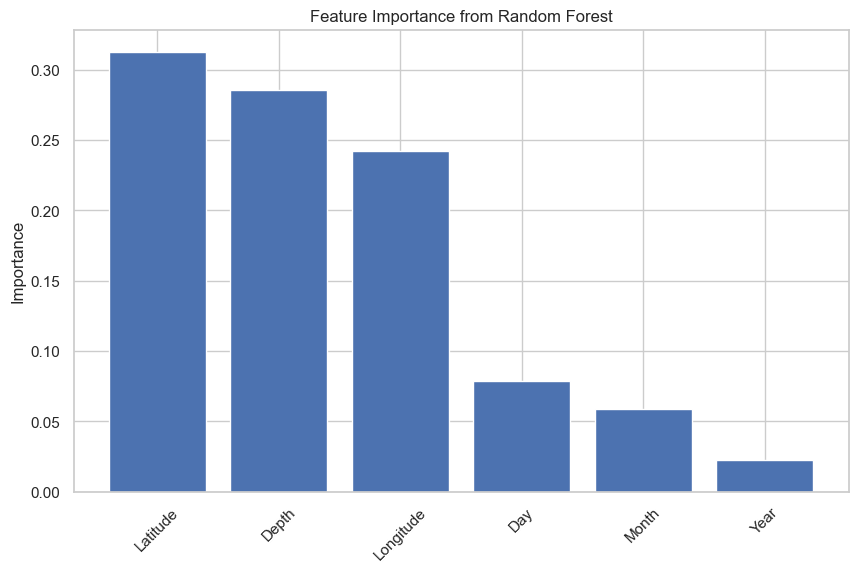

In [156]:
import matplotlib.pyplot as plt
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.title('Feature Importance from Random Forest')
plt.ylabel('Importance')
plt.show()